# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# load the data

In [2]:
df=pd.read_csv(r"/Users/mayursantoshtarate/Downloads/ny_taxi_data.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N


In [4]:
# assuming you want to predict the "passenger count "

In [5]:
data=df['passenger_count'].values

# Data preprocessing 

In [6]:
scaler=MinMaxScaler()
data=scaler.fit_transform(data.reshape(-1,1))

In [7]:
sequence_length=10 # we can adjust the sequence 

In [8]:
sequences=[]
targets=[]

In [9]:
for i in range (len(data)-sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])
sequences=np.array(sequences)
targets= np.array(targets)


In [10]:
sequences

array([[[0. ],
        [0. ],
        [0. ],
        ...,
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        ...,
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0. ],
        ...,
        [0. ],
        [0. ],
        [0.6]],

       ...,

       [[0. ],
        [0. ],
        [0. ],
        ...,
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0. ],
        [0.2],
        ...,
        [0. ],
        [0. ],
        [0. ]],

       [[0. ],
        [0.2],
        [0. ],
        ...,
        [0. ],
        [0. ],
        [0. ]]])

In [11]:
X_train,X_test,y_train,y_test=train_test_split(sequences,targets,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((12872, 10, 1), (12872, 1))

# .1 Build and train RNN model

In [12]:
model_rnn=keras.Sequential(name='RNN')

In [13]:
model_rnn.add(keras.layers.SimpleRNN(100,activation='relu',input_shape=(X_train.shape[1],1)))

In [14]:
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam',loss='mean_squared_error')# adam to manage the weight 

In [15]:
model_rnn.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_rnn.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100


2024-10-06 10:03:38.587636: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


403/403 [==============================] - 1s 1ms/step - loss: 0.0700
Epoch 2/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 3/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0693
Epoch 4/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0694
Epoch 5/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0692
Epoch 6/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0692
Epoch 7/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0692
Epoch 8/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 9/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0692
Epoch 10/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 11/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 12/100
403/403 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 13/100
403/403 [===

# LSTM

In [17]:
model_lstm=keras.Sequential(name='LSTM')
model_lstm.add(keras.layers.LSTM(100,activation='relu',input_shape=(X_train.shape[1],1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam',loss='mean_squared_error')
                                                                    

In [18]:
model_lstm.fit(X_train,y_train,epochs=100,batch_size=32,verbose=0)

# GRU

In [19]:
model_gru=keras.Sequential(name='GRU')
model_gru.add(keras.layers.GRU(100,activation='relu',input_shape=(X_train.shape[1],1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
model_gru.fit(X_train,y_train,epochs=100,batch_size=32,verbose=0)

# Evaluate Model

In [21]:
from sklearn.metrics import mean_squared_error
def evaluate_model(model,X_test,y_test):
    X_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
    y_pred=model.predict(X_test_reshaped)
    y_pred=scaler.inverse_transform(y_pred).flatten()
    y_pred=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
    mse=mean_squared_error(y_test,y_pred)
    return mse

In [22]:
mse_rnn=evaluate_model(model_rnn,X_test,y_test)
mse_lstm=evaluate_model(model_lstm,X_test,y_test)
mse_gru=evaluate_model(model_gru,X_test,y_test)
print("RNN mse:",mse_rnn)
print("lstm mse:",mse_lstm)
print('GRU mse:',mse_gru)


101/101 [==============================] - 0s 1ms/step
RNN mse: 3.544885021752642
lstm mse: 3.544885021752642
GRU mse: 3.544885021752642


101/101 [==============================] - 0s 1ms/step


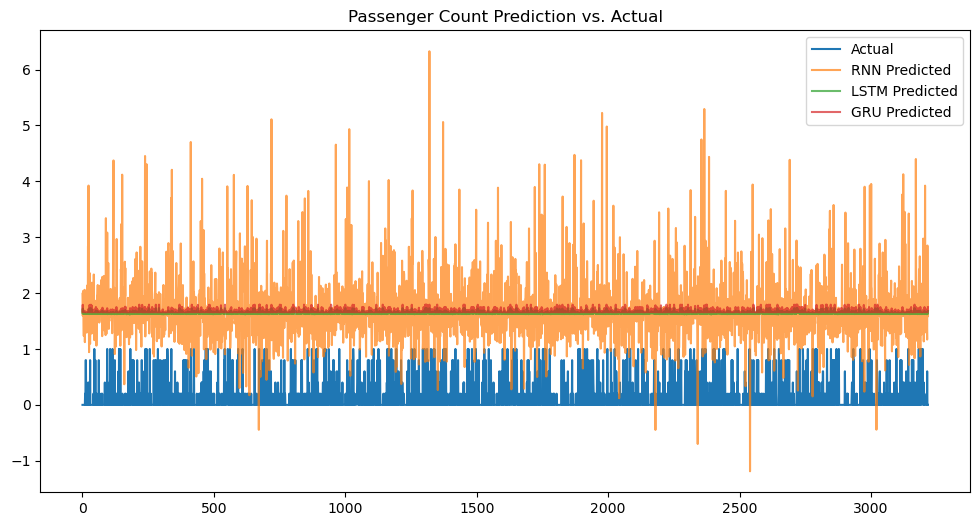

In [23]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()